In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.append('/'.join(os.getcwd().split('/')[:-2]))

from src.code.models.RidgeModel import RidgeModel
from src.code.models.LassoModel import LassoModel
from src.code.models.RandomForestModel import RandomForestModel
from src.code.validation.ModelValidation import ModelValidation

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_csv('./Preprocessed_data.csv', sep=';')
df.head()

,date,target_dollar_price,ACF - Crystal Sugar Futures,AFS - RANDE OF SOUTH AFRICA (TYPE A),ARB - Argentinian peso,ARS - Argentinian peso,AUD - Australian dollar,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,...,USIMA - USIM5 Future Contract,VALEO - VALE3 Future Contract,VVARO - VVAR3 Future Contract,WDL - US Dollar futures Mini,WDO - Dollar Mini - WDO,WEU - MINI EURO,WIN - Ibovespa Mini,WSP - S&P 500,WTI - Oil Mini,ZAR - SOUTH AFRICAN RAND
0,01/01/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/02/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/03/2011,1.6501,NaN,NaN,NaN,NaN,1696.178433,NaN,NaN,NaN,...,NaN,NaN,NaN,1663.0800,NaN,NaN,70682.0,NaN,NaN,NaN
3,01/04/2011,1.6616,NaN,NaN,NaN,NaN,1675.237500,NaN,NaN,NaN,...,NaN,NaN,NaN,1677.6985,NaN,NaN,71090.0,NaN,NaN,NaN
4,01/05/2011,1.6760,NaN,NaN,NaN,NaN,1682.144000,NaN,NaN,NaN,...,NaN,NaN,NaN,1688.7720,NaN,NaN,71774.0,NaN,NaN,NaN


In [4]:
pd.options.display.max_columns = 84
pd.options.display.max_rows = 42

In [5]:
corr = df.corr().fillna(0)
corr

,target_dollar_price,ACF - Crystal Sugar Futures,AFS - RANDE OF SOUTH AFRICA (TYPE A),ARB - Argentinian peso,ARS - Argentinian peso,AUD - Australian dollar,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,B40 - Global 2040,BGI - Live cattle,BRI - IBrX-50,BSE - BVMF SENSEX 30 Index Future Contract,CAD - Canadian dollar,CAN - CANADIAN DOLLAR (TYPE A),CCM - Cash- Settled Corn Futures,CCROO - CCRO3 Future Contract,CHF - SWISS FRANC,CHL - CHILEAN PESO (TYPE A),CIELO - CIEL3 Future Contract,CLP - CHILEAN PESO,CMIGP - CMIG4 Future Contract,CNH - Chinese Yuan (Type A),CNY - YUAN,COP - Milho base de preço Cascavel,CPG - Milho base de preço Paranaguá,CRV - Corn Price Basis – Rio Verde,CTM - Milho base de preço Triângulo Mineiro,DAP - ID x IPCA spread,DCO - OC1 x US Dollar Spread Futures,DDI - ID x US Dollar spread,DI1 - 1-day Interbank Deposits,DOL - US Dollar,ETH - Hydrous Ethanol,ETN - Anhydrous Ethanol,EUP - EURO (TYPE B),EUR - Euro,FRC - FRA on ID x US Dollar spread,FRO - FRA on OC1 x U.S. Dollar Spread,GBP - POUND STERLING,GBR - POUND STERLING (TYPE B),HSI - BVMF HANG SENG Futures Contracts,HYPEO - HYPE3 Future Contract,IAP - IPCA,ICF - 4/5 Arabica Coffee,IGM - IGP-M,IMV - Merval Future Index Contract,IND - Ibovespa,INK - Nikkei Future Index Contract,ISP - S&P 500,JAP - JAPANESE YEN (TYPE A),JPY - YEN,JSE - BVMF FTSE/JSE TOP 40 Index Future Contract,KFE - 6/7 Arabica Coffee,KROTO - KROT3 Future Contract,MEX - MEXICAN PESO (TYPE A),MIX - BVMF MICEX Index Future Contract,MXN - PESO,NOK - NORWEGIAN CROWN (TYPE A),NZD - NEW ZEALAND DOLLAR,NZL - NEW ZEALAND DOLLAR (TYPE B),OC1 - OC1 Futures Contract,OZ1 - Gold 250g.,PCARP - PCAR4 Future Contract,PETRP - PETR4 Future Contract,PSSAO - PSSA3 Future Contract,RUB - RUSSIAN RUBLE (TYPE A),SEK - SWEDISH KRONA (TYPE A),SFI - Cash-Settled Soybean,SJC - Soy Financial Cross Listing,SWI - SWISS FRANC (TYPE A),T10 - US T-Note,TRY - TURKISH LIRA,TUQ - TURKISH LIRA (TYPE A),USIMA - USIM5 Future Contract,VALEO - VALE3 Future Contract,VVARO - VVAR3 Future Contract,WDL - US Dollar futures Mini,WDO - Dollar Mini - WDO,WEU - MINI EURO,WIN - Ibovespa Mini,WSP - S&P 500,WTI - Oil Mini,ZAR - SOUTH AFRICAN RAND
target_dollar_price,1.000000,0.598689,0.902997,-0.414873,0.728702,0.973780,-0.162136,0.502865,0.633343,-0.911934,0.930725,0.634806,-0.265321,0.984245,0.429305,0.829733,-0.304714,0.991120,0.780644,-0.882080,0.957161,-0.867105,0.172045,0.987462,0.387171,0.709306,0.079006,0.175684,-0.080908,-0.129557,0.548454,0.539333,0.993124,0.819833,0.278080,0.262332,0.965316,-0.283371,-0.596861,0.964685,-0.131149,-0.748037,0.064531,0.716989,-0.760150,0.888834,0.209952,0.601191,-0.240178,0.817618,-0.588702,0.954532,-0.159513,-0.904156,-0.192198,0.848090,0.397516,0.882072,0.683165,0.979909,-0.388384,-0.490240,0.956748,-0.656881,-0.746499,-0.496388,0.852132,-0.185109,-0.834004,-0.727186,-0.785122,0.252452,-0.478330,0.909280,-0.326195,0.397093,0.706440,0.995092,0.996419,0.982306,0.614744,0.426982,-0.697087,0.868174
ACF - Crystal Sugar Futures,0.598689,1.000000,0.000000,0.000000,0.000000,0.412737,0.000000,-0.155609,0.000000,-0.851106,0.745010,0.439973,0.000000,0.381259,0.000000,0.569418,0.000000,0.547854,0.000000,0.000000,0.347226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.624458,-1.000000,-0.068895,0.033651,0.531822,0.867932,0.000000,0.000000,0.220532,0.053010,0.000000,0.229962,0.000000,0.000000,0.000000,0.932139,0.311801,0.831638,0.000000,0.265928,0.000000,0.879758,0.000000,0.702541,0.000000,0.817079,0.000000,0.000000,0.000000,-0.034080,0.000000,0.669883,0.000000,0.501568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.977944,-0.711881,0.000000,-0.026511,-0.589703,0.000000,0.000000,0.000000,0.000000,0.000000,0.564713,1.000000,0.266806,0.000000,-0.255891,-0.093820
AFS - RANDE OF SOUTH AFRICA (TYPE A),0.902997,0.000000,1.000000,-0.341990,0.338705,0.774249,-0.430751,0.000000,0.464520,0.000000,0.563947,-0.440166,0.000000,0.844764,0.662582,0.512420,-0.309552,0.865

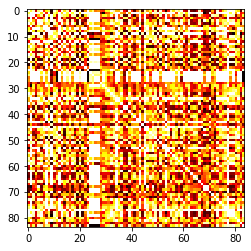

In [6]:
plt.imshow(df.corr(),cmap='hot',interpolation='nearest')

In [7]:
corr.abs()

,target_dollar_price,ACF - Crystal Sugar Futures,AFS - RANDE OF SOUTH AFRICA (TYPE A),ARB - Argentinian peso,ARS - Argentinian peso,AUD - Australian dollar,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,B40 - Global 2040,BGI - Live cattle,BRI - IBrX-50,BSE - BVMF SENSEX 30 Index Future Contract,CAD - Canadian dollar,CAN - CANADIAN DOLLAR (TYPE A),CCM - Cash- Settled Corn Futures,CCROO - CCRO3 Future Contract,CHF - SWISS FRANC,CHL - CHILEAN PESO (TYPE A),CIELO - CIEL3 Future Contract,CLP - CHILEAN PESO,CMIGP - CMIG4 Future Contract,CNH - Chinese Yuan (Type A),CNY - YUAN,COP - Milho base de preço Cascavel,CPG - Milho base de preço Paranaguá,CRV - Corn Price Basis – Rio Verde,CTM - Milho base de preço Triângulo Mineiro,DAP - ID x IPCA spread,DCO - OC1 x US Dollar Spread Futures,DDI - ID x US Dollar spread,DI1 - 1-day Interbank Deposits,DOL - US Dollar,ETH - Hydrous Ethanol,ETN - Anhydrous Ethanol,EUP - EURO (TYPE B),EUR - Euro,FRC - FRA on ID x US Dollar spread,FRO - FRA on OC1 x U.S. Dollar Spread,GBP - POUND STERLING,GBR - POUND STERLING (TYPE B),HSI - BVMF HANG SENG Futures Contracts,HYPEO - HYPE3 Future Contract,IAP - IPCA,ICF - 4/5 Arabica Coffee,IGM - IGP-M,IMV - Merval Future Index Contract,IND - Ibovespa,INK - Nikkei Future Index Contract,ISP - S&P 500,JAP - JAPANESE YEN (TYPE A),JPY - YEN,JSE - BVMF FTSE/JSE TOP 40 Index Future Contract,KFE - 6/7 Arabica Coffee,KROTO - KROT3 Future Contract,MEX - MEXICAN PESO (TYPE A),MIX - BVMF MICEX Index Future Contract,MXN - PESO,NOK - NORWEGIAN CROWN (TYPE A),NZD - NEW ZEALAND DOLLAR,NZL - NEW ZEALAND DOLLAR (TYPE B),OC1 - OC1 Futures Contract,OZ1 - Gold 250g.,PCARP - PCAR4 Future Contract,PETRP - PETR4 Future Contract,PSSAO - PSSA3 Future Contract,RUB - RUSSIAN RUBLE (TYPE A),SEK - SWEDISH KRONA (TYPE A),SFI - Cash-Settled Soybean,SJC - Soy Financial Cross Listing,SWI - SWISS FRANC (TYPE A),T10 - US T-Note,TRY - TURKISH LIRA,TUQ - TURKISH LIRA (TYPE A),USIMA - USIM5 Future Contract,VALEO - VALE3 Future Contract,VVARO - VVAR3 Future Contract,WDL - US Dollar futures Mini,WDO - Dollar Mini - WDO,WEU - MINI EURO,WIN - Ibovespa Mini,WSP - S&P 500,WTI - Oil Mini,ZAR - SOUTH AFRICAN RAND
target_dollar_price,1.000000,0.598689,0.902997,0.414873,0.728702,0.973780,0.162136,0.502865,0.633343,0.911934,0.930725,0.634806,0.265321,0.984245,0.429305,0.829733,0.304714,0.991120,0.780644,0.882080,0.957161,0.867105,0.172045,0.987462,0.387171,0.709306,0.079006,0.175684,0.080908,0.129557,0.548454,0.539333,0.993124,0.819833,0.278080,0.262332,0.965316,0.283371,0.596861,0.964685,0.131149,0.748037,0.064531,0.716989,0.760150,0.888834,0.209952,0.601191,0.240178,0.817618,0.588702,0.954532,0.159513,0.904156,0.192198,0.848090,0.397516,0.882072,0.683165,0.979909,0.388384,0.490240,0.956748,0.656881,0.746499,0.496388,0.852132,0.185109,0.834004,0.727186,0.785122,0.252452,0.478330,0.909280,0.326195,0.397093,0.706440,0.995092,0.996419,0.982306,0.614744,0.426982,0.697087,0.868174
ACF - Crystal Sugar Futures,0.598689,1.000000,0.000000,0.000000,0.000000,0.412737,0.000000,0.155609,0.000000,0.851106,0.745010,0.439973,0.000000,0.381259,0.000000,0.569418,0.000000,0.547854,0.000000,0.000000,0.347226,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.624458,1.000000,0.068895,0.033651,0.531822,0.867932,0.000000,0.000000,0.220532,0.053010,0.000000,0.229962,0.000000,0.000000,0.000000,0.932139,0.311801,0.831638,0.000000,0.265928,0.000000,0.879758,0.000000,0.702541,0.000000,0.817079,0.000000,0.000000,0.000000,0.034080,0.000000,0.669883,0.000000,0.501568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.977944,0.711881,0.000000,0.026511,0.589703,0.000000,0.000000,0.000000,0.000000,0.000000,0.564713,1.000000,0.266806,0.000000,0.255891,0.093820
AFS - RANDE OF SOUTH AFRICA (TYPE A),0.902997,0.000000,1.000000,0.341990,0.338705,0.774249,0.430751,0.000000,0.464520,0.000000,0.563947,0.440166,0.000000,0.844764,0.662582,0.512420,0.309552,0.865096,0.819100,0.831808,0.726388,0.873387,0.41846

In [8]:
corr.shape

(84, 84)

In [9]:
def get_high_correlation_columns(df, threshold):
    rows, cols = df.shape
    
    flagged_positions = np.zeros((rows, cols))
    
    unique_flags = []
    
    correlated_features = set()
    correlation_matrix = df.copy()

    for i in range(len(correlation_matrix .columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
    
    return correlated_features
    
    
def remove_df_columns(df, columns):
    return df.drop(labels=columns, axis=1)

def fill_missing_values(df):
    '''
        The strategy for filling missing values here is the following,
        first we try to fill missing values with the past missing value we have available, when
        we don't have that, we fill the missing values with the next forward value available 
    '''
    
    return df.fillna(method='bfill', axis=0).fillna(method='ffill', axis=0)
    
def add_rolling_window_features(df, window_sizes):
    
    result = df.copy()
    
    for window_size in window_sizes: 
        
        rolling_windows = df.copy().drop('target_dollar_price', axis=1)
        rolling_windows.iloc[: 2:] = rolling_windows.iloc[:, 2:].rolling(window=window_size).mean()
        result = result.merge(rolling_windows, on=['date'], suffixes=['', f'_window_length_{window_size}'])
    
    return result

def sort_df_columns(df):
    columns = sorted(df.columns)[-2:]
    columns.extend(sorted(df.columns)[:-2])
    df.columns = columns
    
def train_test_split(df, train_split_size):
    total_rows, total_columns = df.shape
    
    train_size = round(total_rows * train_split_size)
    test_size = total_rows - train_size
    
    train_df = df.iloc[:train_size, :]
    test_df = df.iloc[train_size:, :]
    
    return train_df, test_df

def apply_min_max_scaling(df, scaler=None):
    if scaler == None:
        scaler = MinMaxScaler()
        scaler.fit(df.iloc[:, 1:])
    
    scaled_df = df.copy()
    
    scaled_df.iloc[:, 1:] = scaler.transform(df.iloc[:, 1:])
    
    return scaled_df, scaler

correlation_threshold = 0.90

filtered_df = remove_df_columns(
    df,
    get_high_correlation_columns(df.iloc[:, 1:].corr().abs(), correlation_threshold)
)

back_filled_df = fill_missing_values(filtered_df)
shifted_df = back_filled_df.set_index(['date', 'target_dollar_price']).shift(1).dropna().reset_index()

windows_df = add_rolling_window_features(shifted_df, window_sizes=[7, 21])

train_df, test_df = train_test_split(windows_df, train_split_size=0.8)

scaled_train_df, scaler = apply_min_max_scaling(train_df)
scaled_test_df, scaler = apply_min_max_scaling(test_df, scaler)


In [204]:
df.iloc[:]

,date,target_dollar_price,ACF - Crystal Sugar Futures,AFS - RANDE OF SOUTH AFRICA (TYPE A),ARB - Argentinian peso,ARS - Argentinian peso,AUD - Australian dollar,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,B40 - Global 2040,BGI - Live cattle,BRI - IBrX-50,BSE - BVMF SENSEX 30 Index Future Contract,CAD - Canadian dollar,CAN - CANADIAN DOLLAR (TYPE A),CCM - Cash- Settled Corn Futures,CCROO - CCRO3 Future Contract,CHF - SWISS FRANC,CHL - CHILEAN PESO (TYPE A),CIELO - CIEL3 Future Contract,CLP - CHILEAN PESO,CMIGP - CMIG4 Future Contract,CNH - Chinese Yuan (Type A),CNY - YUAN,COP - Milho base de preço Cascavel,CPG - Milho base de preço Paranaguá,CRV - Corn Price Basis – Rio Verde,CTM - Milho base de preço Triângulo Mineiro,DAP - ID x IPCA spread,DCO - OC1 x US Dollar Spread Futures,DDI - ID x US Dollar spread,DI1 - 1-day Interbank Deposits,DOL - US Dollar,ETH - Hydrous Ethanol,ETN - Anhydrous Ethanol,EUP - EURO (TYPE B),EUR - Euro,FRC - FRA on ID x US Dollar spread,FRO - FRA on OC1 x U.S. Dollar Spread,GBP - POUND STERLING,GBR - POUND STERLING (TYPE B),...,HYPEO - HYPE3 Future Contract,IAP - IPCA,ICF - 4/5 Arabica Coffee,IGM - IGP-M,IMV - Merval Future Index Contract,IND - Ibovespa,INK - Nikkei Future Index Contract,ISP - S&P 500,JAP - JAPANESE YEN (TYPE A),JPY - YEN,JSE - BVMF FTSE/JSE TOP 40 Index Future Contract,KFE - 6/7 Arabica Coffee,KROTO - KROT3 Future Contract,MEX - MEXICAN PESO (TYPE A),MIX - BVMF MICEX Index Future Contract,MXN - PESO,NOK - NORWEGIAN CROWN (TYPE A),NZD - NEW ZEALAND DOLLAR,NZL - NEW ZEALAND DOLLAR (TYPE B),OC1 - OC1 Futures Contract,OZ1 - Gold 250g.,PCARP - PCAR4 Future Contract,PETRP - PETR4 Future Contract,PSSAO - PSSA3 Future Contract,RUB - RUSSIAN RUBLE (TYPE A),SEK - SWEDISH KRONA (TYPE A),SFI - Cash-Settled Soybean,SJC - Soy Financial Cross Listing,SWI - SWISS FRANC (TYPE A),T10 - US T-Note,TRY - TURKISH LIRA,TUQ - TURKISH LIRA (TYPE A),USIMA - USIM5 Future Contract,VALEO - VALE3 Future Contract,VVARO - VVAR3 Future Contract,WDL - US Dollar futures Mini,WDO - Dollar Mini - WDO,WEU - MINI EURO,WIN - Ibovespa Mini,WSP - S&P 500,WTI - Oil Mini,ZAR - SOUTH AFRICAN RAND
0,01/01/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/02/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/03/2011,1.6501,NaN,NaN,NaN,NaN,1696.178433,NaN,NaN,NaN,132.4063,94.754286,9792.0,NaN,1685.638333,NaN,26.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84103.866000,NaN,85184.194687,70083.964063,1861.981708,1068.576923,NaN,NaN,2259.8694,4.011667,NaN,2593.567500,NaN,...,NaN,3194.935,285.750000,452.845,NaN,75047.500000,NaN,NaN,NaN,2046.507333,NaN,NaN,NaN,NaN,NaN,1352.094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.1719,NaN,NaN,NaN,NaN,NaN,1663.0800,NaN,NaN,70682.000000,NaN,NaN,NaN
3,01/04/2011,1.6616,NaN,NaN,NaN,NaN,1675.237500,NaN,NaN,NaN,132.8125,94.962857,9845.0,NaN,1681.823333,NaN,25.814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84125.272000,NaN,86264.646452,69091.622581,1885.808304,1064.769231,NaN,NaN,2272.8860,3.977333,NaN,2622.912000,NaN,...,NaN,3194.935,281.216667,455.389,NaN,75487.833333,NaN,NaN,NaN,2051.042000,NaN,NaN,NaN,NaN,NaN,1361.488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.3125,NaN,NaN,NaN,NaN,NaN,1677.6985,NaN,NaN,71090.000000,NaN,NaN,NaN
4,01/05/2011,1.6760,NaN,NaN,NaN,NaN,1682.144000,NaN,NaN,NaN,132.9688,95.748571,9960.0,NaN,1705.140000,NaN,26.115,NaN,NaN,NaN

In [10]:
scaled_train_df

,date,target_dollar_price,ACF - Crystal Sugar Futures,ARB - Argentinian peso,ARS - Argentinian peso,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,BRI - IBrX-50,BSE - BVMF SENSEX 30 Index Future Contract,CAN - CANADIAN DOLLAR (TYPE A),CCM - Cash- Settled Corn Futures,CCROO - CCRO3 Future Contract,CHL - CHILEAN PESO (TYPE A),CIELO - CIEL3 Future Contract,CMIGP - CMIG4 Future Contract,CNH - Chinese Yuan (Type A),DAP - ID x IPCA spread,DDI - ID x US Dollar spread,DI1 - 1-day Interbank Deposits,ETH - Hydrous Ethanol,EUP - EURO (TYPE B),FRC - FRA on ID x US Dollar spread,GBR - POUND STERLING (TYPE B),HSI - BVMF HANG SENG Futures Contracts,HYPEO - HYPE3 Future Contract,ICF - 4/5 Arabica Coffee,JAP - JAPANESE YEN (TYPE A),JSE - BVMF FTSE/JSE TOP 40 Index Future Contract,KROTO - KROT3 Future Contract,MIX - BVMF MICEX Index Future Contract,NOK - NORWEGIAN CROWN (TYPE A),PCARP - PCAR4 Future Contract,PETRP - PETR4 Future Contract,PSSAO - PSSA3 Future Contract,RUB - RUSSIAN RUBLE (TYPE A),SWI - SWISS FRANC (TYPE A),TRY - TURKISH LIRA,USIMA - USIM5 Future Contract,ACF - Crystal Sugar Futures_window_length_7,ARB - Argentinian peso_window_length_7,ARS - Argentinian peso_window_length_7,...,PSSAO - PSSA3 Future Contract_window_length_7,RUB - RUSSIAN RUBLE (TYPE A)_window_length_7,SWI - SWISS FRANC (TYPE A)_window_length_7,TRY - TURKISH LIRA_window_length_7,USIMA - USIM5 Future Contract_window_length_7,ACF - Crystal Sugar Futures_window_length_21,ARB - Argentinian peso_window_length_21,ARS - Argentinian peso_window_length_21,AUS - AUSTRALIAN DOLLAR (TYPE B)_window_length_21,B20 - Global 2020_window_length_21,B3SAO - B3SA3 Future Contract_window_length_21,BRI - IBrX-50_window_length_21,BSE - BVMF SENSEX 30 Index Future Contract_window_length_21,CAN - CANADIAN DOLLAR (TYPE A)_window_length_21,CCM - Cash- Settled Corn Futures_window_length_21,CCROO - CCRO3 Future Contract_window_length_21,CHL - CHILEAN PESO (TYPE A)_window_length_21,CIELO - CIEL3 Future Contract_window_length_21,CMIGP - CMIG4 Future Contract_window_length_21,CNH - Chinese Yuan (Type A)_window_length_21,DAP - ID x IPCA spread_window_length_21,DDI - ID x US Dollar spread_window_length_21,DI1 - 1-day Interbank Deposits_window_length_21,ETH - Hydrous Ethanol_window_length_21,EUP - EURO (TYPE B)_window_length_21,FRC - FRA on ID x US Dollar spread_window_length_21,GBR - POUND STERLING (TYPE B)_window_length_21,HSI - BVMF HANG SENG Futures Contracts_window_length_21,HYPEO - HYPE3 Future Contract_window_length_21,ICF - 4/5 Arabica Coffee_window_length_21,JAP - JAPANESE YEN (TYPE A)_window_length_21,JSE - BVMF FTSE/JSE TOP 40 Index Future Contract_window_length_21,KROTO - KROT3 Future Contract_window_length_21,MIX - BVMF MICEX Index Future Contract_window_length_21,NOK - NORWEGIAN CROWN (TYPE A)_window_length_21,PCARP - PCAR4 Future Contract_window_length_21,PETRP - PETR4 Future Contract_window_length_21,PSSAO - PSSA3 Future Contract_window_length_21,RUB - RUSSIAN RUBLE (TYPE A)_window_length_21,SWI - SWISS FRANC (TYPE A)_window_length_21,TRY - TURKISH LIRA_window_length_21,USIMA - USIM5 Future Contract_window_length_21
0,01/04/2011,0.047895,0.033316,0.0,1.0,1.0,0.207481,1.0,0.303247,0.294788,0.0,0.069295,1.0,1.0,0.0,0.0,0.0,0.337963,0.126894,0.202825,0.028210,1.0,0.700533,1.0,0.891844,0.0,0.638634,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,...,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,1.0,0.207481,1.0,0.303247,0.294788,0.0,0.069295,1.0,1.0,0.0,0.0,0.0,0.337963,0.126894,0.202825,0.028210,1.0,0.700533,1.0,0.891844,0.0,0.638634,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0
1,01/05/2011,0.053313,0.033316,0.0,1.0,1.0,0.207481,1.0,0.307981,0.294788,0.0,0.060824,1.0,1.0,0.0,0.0,0.0,0.338854,0.177947,0.176316,0.024147,1.0,0.693400,1.0,0.891844,0.0,0.621787,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,...,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,1.0,0.207481,1.0,0.307981,0.

In [213]:
import warnings
warnings.filterwarnings('ignore')

input_data = pd.concat([scaled_train_df, scaled_test_df])
X = input_data.drop(['date', 'target_dollar_price'], axis=1)
y = input_data[['target_dollar_price']]

model = LassoModel(alpha=0.001)

validation = ModelValidation(
    model=model,
    X=X,
    y=y,
    initial_train_size=0.80,
    scaling_max=scaler.data_max_[0],
    scaling_min=scaler.data_min_[0]
)

y_true, y_pred = validation.validate()

There are N=722 weeks of test
week=9
partial r2=-18.132685462864362
mean absolute percentage error MAPE=4.211126256405768
partial adjusted r2=1.0598104095747758

week=19
partial r2=-30.6670037252982
mean absolute percentage error MAPE=3.5822720419263274
partial adjusted r2=1.2097152564589284

week=29
partial r2=-28.834048824575774
mean absolute percentage error MAPE=2.8769856662567075
partial adjusted r2=1.3026188932888063

week=39
partial r2=-3.7959406554652224
mean absolute percentage error MAPE=2.4239975933995597
partial adjusted r2=1.0656516972843608

week=49
partial r2=-1.3687163929539152
mean absolute percentage error MAPE=2.0662614189837853
partial adjusted r2=1.0408830937846925

week=59
partial r2=-1.1532234188326793
mean absolute percentage error MAPE=1.7901917551138413
partial adjusted r2=1.0449063915557186

week=69
partial r2=-0.4952708761901625
mean absolute percentage error MAPE=1.630080480655137
partial adjusted r2=1.0365993935640727

week=79
partial r2=-0.420408456066389

week=629
partial r2=0.8491579832284287
mean absolute percentage error MAPE=2.1474151857874966
partial adjusted r2=1.042000720916033

week=639
partial r2=0.8418188256004344
mean absolute percentage error MAPE=2.266408095235263
partial adjusted r2=1.0449434283865373

week=649
partial r2=0.8417136709169538
mean absolute percentage error MAPE=2.3055830384211844
partial adjusted r2=1.045881119953058

week=659
partial r2=0.8215162767234947
mean absolute percentage error MAPE=2.4315328922397295
partial adjusted r2=1.0527684045039107

week=669
partial r2=0.8265812831941645
mean absolute percentage error MAPE=2.445438878130293
partial adjusted r2=1.0522835157922956

week=679
partial r2=0.8328305081680969
mean absolute percentage error MAPE=2.452684389080479
partial adjusted r2=1.051384375262047

week=689
partial r2=0.8396141232961023
mean absolute percentage error MAPE=2.4380572494425476
partial adjusted r2=1.0502527826507437

week=699
partial r2=0.8447063664594878
mean absolute percentage erro

In [12]:
print(input_data.shape)
input_data.head()

(3610, 113)


,date,target_dollar_price,ACF - Crystal Sugar Futures,ARB - Argentinian peso,ARS - Argentinian peso,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,BRI - IBrX-50,BSE - BVMF SENSEX 30 Index Future Contract,CAN - CANADIAN DOLLAR (TYPE A),CCM - Cash- Settled Corn Futures,CCROO - CCRO3 Future Contract,CHL - CHILEAN PESO (TYPE A),CIELO - CIEL3 Future Contract,CMIGP - CMIG4 Future Contract,CNH - Chinese Yuan (Type A),DAP - ID x IPCA spread,DDI - ID x US Dollar spread,DI1 - 1-day Interbank Deposits,ETH - Hydrous Ethanol,EUP - EURO (TYPE B),FRC - FRA on ID x US Dollar spread,GBR - POUND STERLING (TYPE B),HSI - BVMF HANG SENG Futures Contracts,HYPEO - HYPE3 Future Contract,ICF - 4/5 Arabica Coffee,JAP - JAPANESE YEN (TYPE A),JSE - BVMF FTSE/JSE TOP 40 Index Future Contract,KROTO - KROT3 Future Contract,MIX - BVMF MICEX Index Future Contract,NOK - NORWEGIAN CROWN (TYPE A),PCARP - PCAR4 Future Contract,PETRP - PETR4 Future Contract,PSSAO - PSSA3 Future Contract,RUB - RUSSIAN RUBLE (TYPE A),SWI - SWISS FRANC (TYPE A),TRY - TURKISH LIRA,USIMA - USIM5 Future Contract,ACF - Crystal Sugar Futures_window_length_7,ARB - Argentinian peso_window_length_7,ARS - Argentinian peso_window_length_7,...,PSSAO - PSSA3 Future Contract_window_length_7,RUB - RUSSIAN RUBLE (TYPE A)_window_length_7,SWI - SWISS FRANC (TYPE A)_window_length_7,TRY - TURKISH LIRA_window_length_7,USIMA - USIM5 Future Contract_window_length_7,ACF - Crystal Sugar Futures_window_length_21,ARB - Argentinian peso_window_length_21,ARS - Argentinian peso_window_length_21,AUS - AUSTRALIAN DOLLAR (TYPE B)_window_length_21,B20 - Global 2020_window_length_21,B3SAO - B3SA3 Future Contract_window_length_21,BRI - IBrX-50_window_length_21,BSE - BVMF SENSEX 30 Index Future Contract_window_length_21,CAN - CANADIAN DOLLAR (TYPE A)_window_length_21,CCM - Cash- Settled Corn Futures_window_length_21,CCROO - CCRO3 Future Contract_window_length_21,CHL - CHILEAN PESO (TYPE A)_window_length_21,CIELO - CIEL3 Future Contract_window_length_21,CMIGP - CMIG4 Future Contract_window_length_21,CNH - Chinese Yuan (Type A)_window_length_21,DAP - ID x IPCA spread_window_length_21,DDI - ID x US Dollar spread_window_length_21,DI1 - 1-day Interbank Deposits_window_length_21,ETH - Hydrous Ethanol_window_length_21,EUP - EURO (TYPE B)_window_length_21,FRC - FRA on ID x US Dollar spread_window_length_21,GBR - POUND STERLING (TYPE B)_window_length_21,HSI - BVMF HANG SENG Futures Contracts_window_length_21,HYPEO - HYPE3 Future Contract_window_length_21,ICF - 4/5 Arabica Coffee_window_length_21,JAP - JAPANESE YEN (TYPE A)_window_length_21,JSE - BVMF FTSE/JSE TOP 40 Index Future Contract_window_length_21,KROTO - KROT3 Future Contract_window_length_21,MIX - BVMF MICEX Index Future Contract_window_length_21,NOK - NORWEGIAN CROWN (TYPE A)_window_length_21,PCARP - PCAR4 Future Contract_window_length_21,PETRP - PETR4 Future Contract_window_length_21,PSSAO - PSSA3 Future Contract_window_length_21,RUB - RUSSIAN RUBLE (TYPE A)_window_length_21,SWI - SWISS FRANC (TYPE A)_window_length_21,TRY - TURKISH LIRA_window_length_21,USIMA - USIM5 Future Contract_window_length_21
0,01/04/2011,0.047895,0.033316,0.0,1.0,1.0,0.207481,1.0,0.303247,0.294788,0.0,0.069295,1.0,1.0,0.0,0.0,0.0,0.337963,0.126894,0.202825,0.028210,1.0,0.700533,1.0,0.891844,0.0,0.638634,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,...,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,1.0,0.207481,1.0,0.303247,0.294788,0.0,0.069295,1.0,1.0,0.0,0.0,0.0,0.337963,0.126894,0.202825,0.028210,1.0,0.700533,1.0,0.891844,0.0,0.638634,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0
1,01/05/2011,0.053313,0.033316,0.0,1.0,1.0,0.207481,1.0,0.307981,0.294788,0.0,0.060824,1.0,1.0,0.0,0.0,0.0,0.338854,0.177947,0.176316,0.024147,1.0,0.693400,1.0,0.891844,0.0,0.621787,0.0,0.664787,0.0,0.111176,1.0,0.0,1.0,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,...,0.0,1.0,0.0,0.444381,1.0,0.033316,0.0,1.0,1.0,0.207481,1.0,0.307981,0.

In [189]:
import warnings
warnings.filterwarnings('ignore')

input_data = pd.concat([scaled_train_df, scaled_test_df])
X = input_data.drop(['date', 'target_dollar_price'], axis=1)
y = input_data[['target_dollar_price']]

parameters = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_leaf': 20,
    'n_jobs': 12,
    'max_features': 40,
}

model = RandomForestModel(**parameters)

validation = ModelValidation(
    model=model,
    X=X,
    y=y,
    initial_train_size=0.8,
    scaling_max=scaler.data_max_[0],
    scaling_min=scaler.data_min_[0],
)

y_true, y_pred = validation.validate()

There are N=722 weeks of test
week=9
partial r2=0.2948085784543335
mean absolute percentage error MAPE=0.71385935540826
partial adjusted r2=1.0022044886397745

week=19
partial r2=0.19732399377559118
mean absolute percentage error MAPE=0.5511858748219474
partial adjusted r2=1.005315735140559

week=29
partial r2=-0.4618308418688577
mean absolute percentage error MAPE=0.628245507243173
partial adjusted r2=1.0148279448807964

week=39
partial r2=0.10189472142247524
mean absolute percentage error MAPE=1.1152833346159217
partial adjusted r2=1.0122941754526231

week=49
partial r2=-0.0043780016476948624
mean absolute percentage error MAPE=1.6049188155241807
partial adjusted r2=1.0173351610006118

week=59
partial r2=-0.08883261354894834
mean absolute percentage error MAPE=1.6872367563278692
partial adjusted r2=1.0227080679389848

week=69
partial r2=-0.18534096404420164
mean absolute percentage error MAPE=2.0228533510195956
partial adjusted r2=1.029013311996825

week=79
partial r2=-0.360589480400

week=619
partial r2=-0.6763566439136557
mean absolute percentage error MAPE=11.50092813414167
partial adjusted r2=1.4573225044436109

week=629
partial r2=-0.6895167680463978
mean absolute percentage error MAPE=11.773539075787742
partial adjusted r2=1.4704320704299176

week=639
partial r2=-0.7038597703582143
mean absolute percentage error MAPE=12.061637917230243
partial adjusted r2=1.4841113353752329

week=649
partial r2=-0.7322887286241322
mean absolute percentage error MAPE=12.322702040081342
partial adjusted r2=1.5021238878414747

week=659
partial r2=-0.7562676974078097
mean absolute percentage error MAPE=12.552468200691083
partial adjusted r2=1.5192375112569523

week=669
partial r2=-0.7728295949655284
mean absolute percentage error MAPE=12.815715679645756
partial adjusted r2=1.534485353326696

week=679
partial r2=-0.7878441048586455
mean absolute percentage error MAPE=13.0781485960353
partial adjusted r2=1.549545562335455

week=689
partial r2=-0.8043686545349842
mean absolute percen

In [149]:
model.model

RandomForestRegressor(max_depth=15, max_features=40, min_samples_leaf=20,
                      n_estimators=200, n_jobs=12)

In [209]:
import warnings
warnings.filterwarnings('ignore')

input_data = pd.concat([scaled_train_df, scaled_test_df])
X = input_data.drop(['date', 'target_dollar_price'], axis=1)
y = input_data[['target_dollar_price']]

model = RidgeModel(alpha=1.0)

validation = ModelValidation(
    model=model,
    X=X,
    y=y,
    initial_train_size=0.8,
    scaling_max=scaler.data_max_[0],
    scaling_min=scaler.data_min_[0],
)

y_true, y_pred = validation.validate()

There are N=722 weeks of test
week=9
partial r2=-21.79651754758425
mean absolute percentage error MAPE=4.693309859270125
partial adjusted r2=1.0712638617326358

week=19
partial r2=-39.276305347417576
mean absolute percentage error MAPE=3.995752254298639
partial adjusted r2=1.2667304989895203

week=29
partial r2=-35.89884081571342
mean absolute percentage error MAPE=3.1592481909410677
partial adjusted r2=1.3742799523104894

week=39
partial r2=-4.731563857296257
mean absolute percentage error MAPE=2.5516342417678164
partial adjusted r2=1.0784594561019845

week=49
partial r2=-1.8179670040789855
mean absolute percentage error MAPE=2.147019501748091
partial adjusted r2=1.0486369789361996

week=59
partial r2=-1.5589925531716298
mean absolute percentage error MAPE=1.8542685939517929
partial adjusted r2=1.0533688796879201

week=69
partial r2=-0.7905362161175298
mean absolute percentage error MAPE=1.7178579100065015
partial adjusted r2=1.0438265338460835

week=79
partial r2=-0.7288980036682282


week=629
partial r2=0.9086793149501943
mean absolute percentage error MAPE=1.9475167415097236
partial adjusted r2=1.0254274948633588

week=639
partial r2=0.908901803408904
mean absolute percentage error MAPE=1.9888122456943462
partial adjusted r2=1.025883391561454

week=649
partial r2=0.9099654302420549
mean absolute percentage error MAPE=1.9982468236450337
partial adjusted r2=1.026097559523406

week=659
partial r2=0.9044503599362471
mean absolute percentage error MAPE=2.055571616420214
partial adjusted r2=1.028249086048458

week=669
partial r2=0.9069604984263784
mean absolute percentage error MAPE=2.0666287408754567
partial adjusted r2=1.028050214760141

week=679
partial r2=0.9102064102911963
mean absolute percentage error MAPE=2.0692979370568816
partial adjusted r2=1.0276006552341683

week=689
partial r2=0.9137883798892604
mean absolute percentage error MAPE=2.0559861310980465
partial adjusted r2=1.0270121902029556

week=699
partial r2=0.9164823168040831
mean absolute percentage erro

In [214]:
_, helper = train_test_split(input_data.copy(), 0.8)

real_scaled = scaler.inverse_transform(helper.drop('date', axis=1))[:, 0]
real_scaled[:5]

array([3.8361, 3.8361, 3.8361, 3.8538, 3.8648])

In [215]:
_, helper = train_test_split(input_data.copy(), 0.8)
helper['target_dollar_price'] = y_pred

print(helper.shape)
predicted_scaled = scaler.inverse_transform(helper.drop('date', axis=1))[:, 0]
predicted_scaled[:5]

(722, 113)


array([3.72245903, 3.71763258, 3.71768139, 3.71768139, 3.69589624])

In [193]:
def compute_return_over_investment(initial_investment, predicted_prices, real_prices):
    
    money = initial_investment
    is_money_in_dollars = False
    
    operations = 0
    
    for i in range(len(predicted_prices) - 1):
        if predicted_prices[i + 1] > real_prices[i] and not is_money_in_dollars:
            money = money / real_prices[i]
            is_money_in_dollars = True
            paid_price = real_prices[i]
            operations += 1
        
        if is_money_in_dollars and predicted_prices[i + 1] <= real_prices[i]:
            money = money * real_prices[i]
            is_money_in_dollars = False
            operations += 1
    
    if is_money_in_dollars:
        money = money * real_prices[-1]
        operations += 1
        
    return money / initial_investment - 1, operations

In [195]:
compute_return_over_investment(100, np.round(predicted_scaled[:300], 3), np.round(real_scaled[:300], 3))

(0.12777955942057928, 24)

In [136]:
compute_return_over_investment(100, np.round(predicted_scaled[:300], 3), np.round(real_scaled[:300], 3))

0.04548378930918395

In [118]:
compute_return_over_investment(100, np.round(predicted_scaled[:300], 3), np.round(real_scaled[:300], 3))

0.0498654647452208

In [127]:
helper.head(1)

,date,target_dollar_price,ACF - Crystal Sugar Futures,ARB - Argentinian peso,ARS - Argentinian peso,AUS - AUSTRALIAN DOLLAR (TYPE B),B20 - Global 2020,B3SAO - B3SA3 Future Contract,BRI - IBrX-50,BSE - BVMF SENSEX 30 Index Future Contract,CAN - CANADIAN DOLLAR (TYPE A),CCM - Cash- Settled Corn Futures,CCROO - CCRO3 Future Contract,CHL - CHILEAN PESO (TYPE A),CIELO - CIEL3 Future Contract,CMIGP - CMIG4 Future Contract,CNH - Chinese Yuan (Type A),DAP - ID x IPCA spread,DDI - ID x US Dollar spread,DI1 - 1-day Interbank Deposits,ETH - Hydrous Ethanol,EUP - EURO (TYPE B),FRC - FRA on ID x US Dollar spread,GBR - POUND STERLING (TYPE B),HSI - BVMF HANG SENG Futures Contracts,HYPEO - HYPE3 Future Contract,ICF - 4/5 Arabica Coffee,JAP - JAPANESE YEN (TYPE A),JSE - BVMF FTSE/JSE TOP 40 Index Future Contract,KROTO - KROT3 Future Contract,MIX - BVMF MICEX Index Future Contract,NOK - NORWEGIAN CROWN (TYPE A),PCARP - PCAR4 Future Contract,PETRP - PETR4 Future Contract,PSSAO - PSSA3 Future Contract,RUB - RUSSIAN RUBLE (TYPE A),SWI - SWISS FRANC (TYPE A),TRY - TURKISH LIRA,USIMA - USIM5 Future Contract,ACF - Crystal Sugar Futures_window_length_7,ARB - Argentinian peso_window_length_7,ARS - Argentinian peso_window_length_7,...,PSSAO - PSSA3 Future Contract_window_length_7,RUB - RUSSIAN RUBLE (TYPE A)_window_length_7,SWI - SWISS FRANC (TYPE A)_window_length_7,TRY - TURKISH LIRA_window_length_7,USIMA - USIM5 Future Contract_window_length_7,ACF - Crystal Sugar Futures_window_length_21,ARB - Argentinian peso_window_length_21,ARS - Argentinian peso_window_length_21,AUS - AUSTRALIAN DOLLAR (TYPE B)_window_length_21,B20 - Global 2020_window_length_21,B3SAO - B3SA3 Future Contract_window_length_21,BRI - IBrX-50_window_length_21,BSE - BVMF SENSEX 30 Index Future Contract_window_length_21,CAN - CANADIAN DOLLAR (TYPE A)_window_length_21,CCM - Cash- Settled Corn Futures_window_length_21,CCROO - CCRO3 Future Contract_window_length_21,CHL - CHILEAN PESO (TYPE A)_window_length_21,CIELO - CIEL3 Future Contract_window_length_21,CMIGP - CMIG4 Future Contract_window_length_21,CNH - Chinese Yuan (Type A)_window_length_21,DAP - ID x IPCA spread_window_length_21,DDI - ID x US Dollar spread_window_length_21,DI1 - 1-day Interbank Deposits_window_length_21,ETH - Hydrous Ethanol_window_length_21,EUP - EURO (TYPE B)_window_length_21,FRC - FRA on ID x US Dollar spread_window_length_21,GBR - POUND STERLING (TYPE B)_window_length_21,HSI - BVMF HANG SENG Futures Contracts_window_length_21,HYPEO - HYPE3 Future Contract_window_length_21,ICF - 4/5 Arabica Coffee_window_length_21,JAP - JAPANESE YEN (TYPE A)_window_length_21,JSE - BVMF FTSE/JSE TOP 40 Index Future Contract_window_length_21,KROTO - KROT3 Future Contract_window_length_21,MIX - BVMF MICEX Index Future Contract_window_length_21,NOK - NORWEGIAN CROWN (TYPE A)_window_length_21,PCARP - PCAR4 Future Contract_window_length_21,PETRP - PETR4 Future Contract_window_length_21,PSSAO - PSSA3 Future Contract_window_length_21,RUB - RUSSIAN RUBLE (TYPE A)_window_length_21,SWI - SWISS FRANC (TYPE A)_window_length_21,TRY - TURKISH LIRA_window_length_21,USIMA - USIM5 Future Contract_window_length_21
2888,12/01/2018,0.815353,0.834642,1.0,0.0,0.0,0.135679,0.0,0.775609,0.02823,1.0,0.266731,0.0,0.0,1.0,1.0,1.0,0.265572,0.277536,0.397803,0.672818,0.0,0.726692,0.0,0.280918,1.0,0.081592,1.0,0.043964,0.0,0.221176,0.0,0.0,0.0,1.0,0.0,1.0,0.208284,0.0,0.834642,1.0,0.0,...,1.0,0.0,1.0,0.208284,0.0,0.834642,1.0,0.0,0.0,0.135679,0.0,0.775609,0.02823,1.0,0.266731,0.0,0.0,1.0,1.0,1.0,0.265572,0.277536,0.397803,0.672818,0.0,0.726692,0.0,0.280918,1.0,0.081592,1.0,0.043964,0.0,0.221176,0.0,0.0,0.0,1.0,0.0,1.0,0.208284,0.0


In [171]:
real_scaled[299] / real_scaled[0] - 1

0.0845129167644223

In [125]:
train_r2

0.8945827870277395

In [49]:
RandomForestRegressor?

In [144]:
RandomForestRegressor?

In [250]:
from sklearn.ensemble import RandomForestRegressor

parameters = {
    'n_estimators': 400,
    'max_depth': 15,
#     'min_samples_split': 10,
    'min_samples_leaf': 30,
    'n_jobs': 12,
    'max_features': 20,
}

model = RandomForestRegressor(
**parameters
)
model.fit(X=windows_train_df.drop(['date', 'target_dollar_price'], axis=1), y=windows_train_df[['target_dollar_price']].values)

train_predictions = model.predict(windows_train_df.drop(['date', 'target_dollar_price'], axis=1))
train_true_values = windows_train_df[['target_dollar_price']].values

train_r2 = r2_score(
    y_pred=train_predictions,
    y_true=train_true_values)

test_predictions = model.predict(windows_test_df.drop(['date', 'target_dollar_price'], axis=1).head(10))
test_true_values = windows_test_df.head(10)[['target_dollar_price']].values

test_r2 = r2_score(
    y_pred=test_predictions,
    y_true=test_true_values)

print(f'Train r2={train_r2}')

print(f'Test r2={test_r2}')

<ipython-input-250-3318df3a1c64>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X=windows_train_df.drop(['date', 'target_dollar_price'], axis=1), y=windows_train_df[['target_dollar_price']].values)


Train r2=0.9944458632828417
Test r2=0.08072470835954482


In [179]:
test_predictions

array([0.86729627, 0.86729627, 0.87314363, 0.8738673 , 0.86820007,
       0.87565058, 0.87065413, 0.87065413, 0.87065413, 0.87776734,
       0.87293827, 0.87293827, 0.87320066, 0.87320815, 0.87320815,
       0.87320815, 0.88098798, 0.87291053, 0.86573325, 0.87145325])

In [180]:
test_true_values

array([[0.86602205],
       [0.87268144],
       [0.87682005],
       [0.90300613],
       [0.88622597],
       [0.89864178],
       [0.89864178],
       [0.89864178],
       [0.89465367],
       [0.87215471],
       [0.88253885],
       [0.89194477],
       [0.88761804],
       [0.88761804],
       [0.88761804],
       [0.89066556],
       [0.88201211],
       [0.88663983],
       [0.88663983],
       [0.88460815]])

In [196]:
results = pd.DataFrame({
    'Lasso': [
        0.8204459376266288,
        2.682772027920391,
        0.04548378930918395,
        0.23904065852887513,
        (110, 274)
    ],
    'Ridge': [
        0.9143858616242316,
        2.123061873865197,
        0.0498654647452208,
        0.3944809125847264,
        (124, 314)
    ],
    'RandomForest': [
        -0.8685923022280675,
        14.113582444611671,
        0.08297297849425078,
        0.08297297849425078,
        (24, 24)
    ],
    'SingleSell': [
        None,
        None,
        0.0845129167644223,
        0.4164125022809624,
        (2, 2)
    ],
}, index=['R2 Score', 'MAPE', 'ROI(300days)', 'ROI(2years)', 'Operations'])

# RandomForest
# Final computed r2=-0.8685923022280675
# Final computed adjusted r2=1.6217143746684064
# Final mean absolute percentage error MAPE=14.113582444611671

# Lasso
# Final computed r2=0.8204459376266288
# Final computed adjusted r2=1.059740876313429
# Final mean absolute percentage error MAPE=2.682772027920391

# Ridge
# Final computed r2=0.9143858616242316
# Final computed adjusted r2=1.028485368605874
# Final mean absolute percentage error MAPE=2.123061873865197

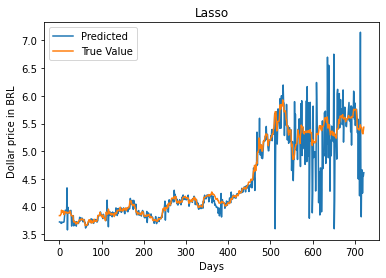

In [216]:
plt.plot(predicted_scaled)
plt.plot(real_scaled)
plt.legend(['Predicted', 'True Value'])
plt.xlabel('Days')
plt.ylabel('Dollar price in BRL')
plt.title('Lasso')
plt.savefig('lasso_plot.png')

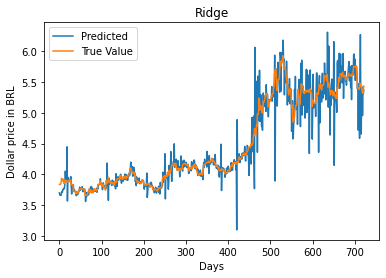

In [212]:
plt.plot(predicted_scaled)
plt.plot(real_scaled)
plt.legend(['Predicted', 'True Value'])
plt.xlabel('Days')
plt.ylabel('Dollar price in BRL')
plt.title('Ridge')
plt.savefig('ridge_plot.png')

In [222]:
input_data.iloc[-400]

date                                              10/19/2019
target_dollar_price                                  0.97784
ACF - Crystal Sugar Futures                         0.834642
ARB - Argentinian peso                            0.00620062
ARS - Argentinian peso                                     0
                                                     ...    
PSSAO - PSSA3 Future Contract_window_length_21       1.26517
RUB - RUSSIAN RUBLE (TYPE A)_window_length_21      -0.282881
SWI - SWISS FRANC (TYPE A)_window_length_21          0.96541
TRY - TURKISH LIRA_window_length_21                 0.185975
USIMA - USIM5 Future Contract_window_length_21     -0.392079
Name: 3210, Length: 113, dtype: object

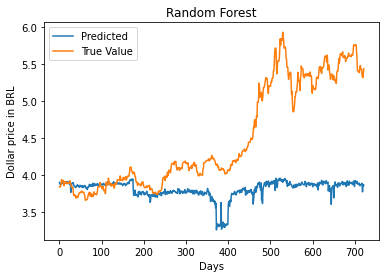

In [208]:
plt.plot(predicted_scaled)
plt.plot(real_scaled)
plt.legend(['Predicted', 'True Value'])
plt.xlabel('Days')
plt.ylabel('Dollar price in BRL')
plt.title('Random Forest')
plt.savefig('random_forest_plot.png')

In [198]:
results

,Lasso,Ridge,RandomForest,SingleSell
R2 Score,0.820446,0.914386,-0.868592,None
MAPE,2.68277,2.12306,14.1136,None
ROI(300days),0.0454838,0.0498655,0.082973,0.0845129
ROI(2years),0.239041,0.394481,0.082973,0.416413
Operations,"(110, 274)","(124, 314)","(24, 24)","(2, 2)"


In [199]:
results.to_csv('result_data_science_project.csv', sep=';')

In [202]:
work_copy = real_scaled.copy()

predicted_work_copy = work_copy[:-1]
work_copy = work_copy[1:]

compute_return_over_investment(100, np.round(predicted_work_copy[:300], 3), np.round(work_copy[:300], 3))

(0.0, 0)